## 1. 프로젝트 개요 & 분석 목표

### 1-1. 프로젝트 개요

호텔 예약 시스템에서 발생하는 **예약 취소(cancellation)** 는 예상 매출 감소, 객실 공실 증가, 인력 및 재고 운영의 비효율 등을 초래하는 중요한 문제이다.  
특히 온라인 예약이 보편화되면서, 고객이 손쉽게 여러 호텔을 중복 예약하거나, 계획 변경에 따라 예약을 취소·변경하는 일이 빈번해지고 있다.

본 프로젝트에서는 **City Hotel**과 **Resort Hotel**의 실제 예약 데이터를 기반으로,  
어떤 조건에서 예약 취소가 많이 발생하는지 데이터를 통해 탐색하고,  
이를 바탕으로 **취소율을 낮출 수 있는 운영 전략**을 도출하고자 한다.

분석에 사용되는 데이터는 다음과 같은 특징을 가진다.

- 분석 대상: City Hotel, Resort Hotel의 예약 데이터
- 기간: 2015년 7월 1일 ~ 2017년 8월 31일
- 주요 내용: 예약 상태(취소 여부), 고객 유형, 예약 경로, 리드타임(예약 시점과 체크인 날짜 사이의 일수), 객실 요금(ADR), 숙박 일수, 특수 요청 여부 등
- 데이터 출처:
  - Kaggle: *Hotel Booking Demand* 데이터셋 [kaggle link](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)
  - 관련 논문: *Hotel booking demand datasets*, ScienceDirect [Hotel Booking Demand Datasets Article](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

본 노트북에서는 Python의 **pandas**, **matplotlib**, **seaborn**을 활용하여 탐색적 데이터 분석(EDA)을 수행하고,  
마지막에는 호텔 관리자 관점에서 적용할 수 있는 실질적인 인사이트를 도출하는 것을 목표로 한다.

---

### 1-2. 분석 목표

1. **예약 취소 현황 파악**  
   - 전체 예약 중 취소가 차지하는 비율을 파악하고,  
   - 호텔 유형(City vs Resort), 시기(월/시즌), 고객 유형 등 기본적인 관점에서 취소 패턴을 살펴본다.

2. **예약 취소에 영향을 미치는 핵심 요인 분석**  
   - 리드타임(lead_time), 객실 요금(adr), market_segment, deposit_type, customer_type 등의 변수와  
     취소 여부(is_canceled) 간의 관계를 탐색한다.
   - 특히 **어떤 조합의 조건**에서 취소율이 높아지는지 확인한다.

3. **City Hotel vs Resort Hotel 비교**  
   - 두 호텔 유형 간에 예약·취소 패턴이 어떻게 다른지 비교한다.
   - 예를 들어, 성수기/비수기, 리드타임, 예약 채널에 따라  
     각 호텔이 겪는 취소 문제의 양상이 어떻게 달라지는지 살펴본다.

4. **취소율 감소를 위한 운영 전략 제안**  
   - 앞선 분석 결과를 바탕으로,  
     - 리드타임이 긴 예약에 대한 정책  
     - 취소율이 높은 예약 채널 및 고객 세그먼트에 대한 대응  
     - 반복 고객(재방문 고객) 관리 전략  
     등을 포함한 실질적인 개선 방안을 제시한다.

---

### 1-3. 분석에서 답하고자 하는 핵심 질문

- **Q1. 전체 예약 중 예약 취소는 어느 정도 비율로 발생하는가?**  
- **Q2. 어떤 조건(호텔 유형, 리드타임, 가격, 고객 유형, 예약 채널 등)에서 취소율이 특히 높아지는가?**  
- **Q3. City Hotel과 Resort Hotel의 예약·취소 패턴은 어떻게 다른가?**  
- **Q4. 발견된 패턴을 기반으로, 호텔은 어떤 방식으로 예약 취소율을 줄이고 수익성을 높일 수 있는가?**

이후 섹션에서는 위 질문들에 단계적으로 답할 수 있도록,  
데이터 이해 → 전처리 → EDA → 인사이트 도출의 순서로 분석을 진행한다.


## 2. 데이터 이해
### 2-1. 데이터 로드 및 기본 정보 확인

이 섹션에서는 분석에 사용할 호텔 예약 데이터를 불러오고,  
데이터의 크기(행·열 수), 컬럼 이름, 자료형 등을 확인하여  
이후 전처리 및 EDA 방향을 잡기 위한 기초 정보를 파악한다.

In [1]:
# 데이터 분석을 위한 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # 경고 무시

sns.set_theme(style="whitegrid")

# plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨질 때 윈도우용
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [2]:
# csv 파일 불러오기
df = pd.read_csv('./content/hotel_data_modified.csv')
pd.set_option('display.max_columns', None)

# 로드가 잘 되었는지 상위 5행만 확인
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03


In [3]:
# 데이터 크기 확인
n_rows, n_cols = df.shape

print(f"행(row) 수: {n_rows:,}")
print(f"열(column) 수: {n_cols}")

행(row) 수: 119,390
열(column) 수: 29


#### 데이터 크기 요약

- 총 **119,390개 행(row)**, **29개 열(column)** 로 구성된 데이터셋이다.
- 약 12만 건의 예약 데이터가 포함되어 있어,  
  통계적 패턴과 세부적인 세그먼트(호텔 타입, 채널, 리드타임 등)를 분석하기에 충분한 규모이다.

In [4]:
# 기초 통계량 확인
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,NaN,NaN,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,NaN,NaN,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,NaN,NaN,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000,NaN,NaN


In [5]:
# 데이터 구조 및 자료형, Non-Null 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### 컬럼 및 자료형 요약

- `df.info()` 결과를 보면,
  - 대부분의 컬럼은 결측치 없이 채워져 있으나  
  - `children`, `agent`, `company` 컬럼에서 **결측치가 존재**함을 확인할 수 있다.
  - 날짜 정보인 `reservation_status_date`는 현재 `object` 타입으로 저장되어 있어,
    필요 시 이후 전처리 단계에서 `datetime` 형으로 변환할 수 있다.

> 결측치 및 자료형 변환에 대한 구체적인 처리는  
> **3. 데이터 전처리** 섹션에서 자세히 수행한다.

### 2-2. 주요 변수 설명

아래 표는 이번 분석에서 사용할 호텔 예약 데이터셋의 주요 변수들을 정리한 것이다.  
각 변수는 **호텔/예약 상태**, **날짜 정보**, **숙박 일수**, **투숙 인원**,  
**예약 특성**, **고객 이력**, **기타 운영 정보** 등으로 분류할 수 있다.

| 컬럼명 | 분류 | 설명 |
| :--- | :--- | :--- |
| **hotel** | 호텔/예약 상태 | 호텔 유형 (Resort Hotel 혹은 City Hotel) |
| **is_canceled** | 호텔/예약 상태 | 호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값 |
| **reservation_status** | 호텔/예약 상태 | 예약의 마지막 상태<br>- Canceled: 고객이 예약을 취소함<br>- Check-Out: 고객이 체크인 후 정상적으로 체크아웃함<br>- No-Show: 노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음 |
| **reservation_status_date** | 호텔/예약 상태 | 마지막 예약 상태(`reservation_status`)가 설정된 날짜 (문자열 형식, 이후 `datetime`으로 변환 가능) |
| **arrival_date_year** | 날짜 정보 | 고객의 호텔 도착 연도 |
| **arrival_date_month** | 날짜 정보 | 고객의 호텔 도착 월 (문자열 형태, 예: January, February 등) |
| **arrival_date_week_number** | 날짜 정보 | 고객의 호텔 도착 주차<br>예시: 2015년도 셋째 주에 도착 → `arrival_date_week_number = 3` |
| **arrival_date_day_of_month** | 날짜 정보 | 고객의 호텔 도착 일<br>예시: 3월 2일에 도착 → `arrival_date_day_of_month = 2` |
| **stays_in_weekend_nights** | 숙박 일수 | 고객이 호텔에 숙박했거나 예약한 **주말(토·일)** 밤 수<br>예시: 평일 3일 + 주말 2일 예약 → `stays_in_weekend_nights = 2` |
| **stays_in_week_nights** | 숙박 일수 | 고객이 호텔에 숙박했거나 예약한 **주중(월~금)** 밤 수<br>예시: 평일 3일 + 주말 2일 예약 → `stays_in_week_nights = 3` |
| **adults** | 투숙 인원 | 예약된 성인 수 (`int`) |
| **children** | 투숙 인원 | 예약된 어린이 수 (`float`, 일부 결측 → 처리 후 정수로 변환 가능) |
| **babies** | 투숙 인원 | 예약된 아기의 수 |
| **lead_time** | 예약 특성 | 호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 일수) |
| **meal** | 예약 특성 | 예약된 식사 유형<br>- Undefined/SC: 식사 미포함 옵션<br>- BB: Bed & Breakfast (조식 포함)<br>- HB: Half Board (아침 + 1끼 식사, 보통 저녁)<br>- FB: Full Board (아침·점심·저녁) |
| **market_segment** | 예약 특성 | 시장 세그먼트(고객이 어떤 경로/목적으로 예약했는지)<br>예: Direct, Corporate, Online TA(Travel Agent), Offline TA/TO 등 |
| **distribution_channel** | 예약 특성 | 예약 유통 채널<br>예: Direct, TA/TO(Travel Agents / Tour Operators) 등 |
| **days_in_waiting_list** | 예약 특성 | 예약이 확정되기 전까지 대기(waiting list)에 있었던 일수 |
| **total_of_special_requests** | 예약 특성 | 고객의 특별 요청 건수 (정수, 0~5 범위)<br>예: 트윈 베드 요청, 아기 침대, 특정 뷰 요청 등 |
| **is_repeated_guest** | 고객 이력 | 이전에 해당 호텔을 이용한 적 있는 고객인지 여부 (1: 재방문, 0: 첫 방문) |
| **previous_cancellations** | 고객 이력 | 현재 예약 이전에 고객이 취소한 예약 횟수 |
| **previous_bookings_not_canceled** | 고객 이력 | 현재 예약 이전에 고객이 취소하지 않고 실제로 이용한 예약 횟수 |
| **reserved_room_type** | 기타 운영 정보 | 고객이 **예약한** 객실 유형 코드 |
| **assigned_room_type** | 기타 운영 정보 | 최종적으로 호텔에서 **배정한** 객실 유형 코드<br>초과 예약, 업그레이드, 고객 요청 등으로 예약 객실과 다른 객실이 배정될 수 있음 |
| **booking_changes** | 기타 운영 정보 | 예약 생성 시점부터 체크인/취소 시점까지 발생한 예약 변경(수정) 횟수 |
| **agent** | 기타 운영 정보 | 예약을 진행한 여행사(Agent)의 ID (`float` → 결측을 0으로 채운 뒤 정수형으로 변환 예정) |
| **company** | 기타 운영 정보 | 예약을 하였거나 예약금을 지불할 책임이 있는 회사/단체의 ID (`float`, 결측 다수 → 분석에서 제외 예정) |
| **country** | 기타 운영 정보 | 투숙객의 출신 국가 (ISO 코드 형식, 문자열) |
| **required_car_parking_spaces** | 기타 운영 정보 | 고객이 요구한 주차 공간 수 (정수) |


### 3-1. 중복값 확인

이 섹션에서는 원본 데이터에 **동일한 예약 정보가 여러 번 기록된 행(완전 중복 행)** 이 존재하는지 확인하고,  
중복 데이터가 분석 결과에 미칠 수 있는 영향을 고려하여 처리 방안을 정한다.

일반적으로 이 데이터셋은 하나의 행이 **하나의 예약(booking)** 을 나타낸다고 가정한다.  
따라서 **모든 컬럼 값이 완전히 동일한 행** 이 여러 번 존재한다면,  
이는 같은 예약이 중복 저장되었을 가능성이 크므로,  
취소율 등 비율/패턴 분석에서 왜곡을 줄이기 위해 중복 행을 제거하는 것이 합리적이다.

다만, 특정 컬럼 일부만 같은 “유사 중복”까지 일괄 제거하면  
서로 다른 예약을 잘못 지우게 될 위험이 크므로,  
본 분석에서는 **“모든 컬럼이 동일한 완전 중복 행”만 제거** 하고,  
나머지 예약은 그대로 유지한 상태에서 분석을 진행한다.


In [6]:
# 전체 행 수 확인
n_rows_before = len(df)

# 완전 중복 행(모든 컬럼이 동일한 행) 개수 확인
dup_count = df.duplicated().sum()
dup_ratio = dup_count / n_rows_before

print(f"중복 행 개수: {dup_count:,}개")
print(f"전체 데이터 대비 중복 비율: {dup_ratio:.2%}")

중복 행 개수: 33,103개
전체 데이터 대비 중복 비율: 27.73%


In [7]:
# 실제로 어떤 행들이 중복되어 있는지 상위 몇 개만 확인
dup_examples = df[df.duplicated()].head(10)
dup_examples

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,250.0,NaN,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,250.0,NaN,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,240.0,NaN,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,3,Check-Out,2015-07-08
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,NaN,110.0,0,0,1,Canceled,2015-07-08
256,Resort Hotel,0,91,2015,July,28,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-12
261,Resort Hotel,0,30,2015,July,28,10,2,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,F,F,0,NaN,NaN,0,0,1,Check-Out,2015-07-14
353,Resort Hotel,0,98,2015,July,29,13,1,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,3,Check-Out,2015-07-15
372,Resort Hotel,0,40,2015,July,29,13,1,4,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,D,D,0,250.0,NaN,0,0,2,Check-Out,2015-07-18


In [8]:
# 원본 백업 (선택사항이지만 추천)
df_raw = df.copy()

# 완전 중복 행 제거
df = df.drop_duplicates().reset_index(drop=True)

# 중복 제거 후 행 수 확인
n_rows_after = len(df)

print(f"중복 제거 전 행 수: {n_rows_before:,}개")
print(f"중복 제거 후 행 수: {n_rows_after:,}개")
print(f"제거된 행 수: {n_rows_before - n_rows_after:,}개")

중복 제거 전 행 수: 119,390개
중복 제거 후 행 수: 86,287개
제거된 행 수: 33,103개


- 중복 제거 전: 119,390건
- 중복 제거 후: 86,287건
- 제거된 완전 중복 행: 33,103건 (약 27.73%)
→ 이후 분석은 **중복 제거된 86,287건의 예약 데이터**를 기준으로 수행한다.

### 3-2. 결측값 확인 및 처리

이 섹션에서는 예약 데이터셋의 **컬럼별 결측값 분포를 확인**하고,  
각 변수의 특성과 결측 비율을 고려하여 **어떻게 처리할지 기준을 세운다.**

먼저 중복 행을 제거한 후의 데이터에서 각 컬럼별 결측값 개수와 비율을 확인한 결과는 다음과 같다  
(아래 값은 대표적인 컬럼만 정리한 것이며, 실제 코드는 전체 컬럼을 대상으로 계산한다).

| 컬럼명 | 결측 개수 | 결측 비율(%) | 비고 |
| :--- | ---: | ---: | :--- |
| `company` | 81,115 | 약 94.0% | 대부분 비어 있음 |
| `agent` | 11,988 | 약 13.9% | 일부 예약에서만 ID 존재 |
| `country` | 451 | 약 0.5% | 극소수 미기입 |
| `children` | 4 | 약 0.005% | 사실상 무시 가능한 수준 |
| 그 외 컬럼 | 0 | 0% | 결측 없음 |

이를 바탕으로, 본 분석에서는 다음과 같은 기준으로 결측값을 처리한다.

1. **`children` (어린이 수)**  
   - 결측값: 단 4건 (전체의 약 0.005%)  
   - 영향이 매우 미미하므로,  
     → **해당 행을 제거(drop)** 하고 분석을 진행한다.

2. **`country` (투숙객 출신 국가)**  
   - 결측값: 451건 (약 0.5%)  
   - 국가 정보는 나중에 EDA에서 쓸 수도 있고,  
     행 전체를 삭제하기에는 아까운 정보가 많으므로  
     → 결측값은 **`"Unknown"`이라는 범주로 대체**한다.

3. **`agent` (여행사 ID)**  
   - 결측값: 약 13.9%  
   - 결측값은 대체로 “여행사 없이 직접 예약한 경우”일 가능성이 높다.  
   - 따라서 `NaN`을 **0으로 채우고**,  
     `0`을 “중개인 없음(직접 예약 또는 미기입)”으로 해석한다.  
   → 이후 분석에서 `agent`는 주로 보조 변수로만 활용하고,  
   세부 ID 값 자체는 범주형 코드로 간주한다.

4. **`company` (회사/단체 ID)**  
   - 결측값: 약 94%로, 대부분이 비어 있음.  
   - 값이 있는 일부 행도 ID 코드일 뿐, 과제 목적(취소 패턴 분석)에  
     직접적인 해석을 주기 어렵다.  
   → 따라서 **`company` 컬럼은 분석에서 제거(drop)** 한다.

위와 같이 처리함으로써,  
- 의미 있는 정보를 최대한 보존하면서  
- 결측값으로 인한 분석 왜곡을 줄이고,  
- 이후 단계(EDA, 시각화)에서 결측으로 인한 에러를 방지한다.

In [9]:
# 결측값 개수
na_counts = df.isna().sum()

# 결측값 비율
na_ratio = (na_counts / len(df)) * 100

# 결측값이 있는 컬럼만 보기 좋게 정리
na_summary = (
    pd.DataFrame({
        "missing_count": na_counts,
        "missing_ratio(%)": na_ratio.round(2)
    })
    .query("missing_count > 0")
    .sort_values("missing_count", ascending=False)
)

na_summary

,missing_count,missing_ratio(%)
company,81115,94.01
agent,11988,13.89
country,451,0.52
children,4,0.00


In [10]:
# 1) children 결측 행 제거 (4건 정도)
before_rows = len(df)
df = df[~df["children"].isna()].copy()
after_rows = len(df)

print(f"[children] 결측 행 제거: {before_rows - after_rows}건 제거 (총 {after_rows}건 남음)")

# 2) country 결측값 -> 'Unknown'으로 대체
df["country"] = df["country"].fillna("Unknown")

# 3) agent 결측값 -> 0으로 대체 (0 = 여행사 없음/직접 예약)
df["agent"] = df["agent"].fillna(0).astype(int)

# 4) company 컬럼 제거
if "company" in df.columns:
    df = df.drop(columns=["company"])
    print("[company] 컬럼을 분석에서 제외(drop)했습니다.")

[children] 결측 행 제거: 4건 제거 (총 86283건 남음)
[company] 컬럼을 분석에서 제외(drop)했습니다.


In [11]:
# 처리 후 결측값이 남아 있는지 최종 확인
df.isna().sum().sort_values(ascending=False).head()

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

결측값 처리 후, 모든 컬럼에서 결측값이 0건인 것을 확인하였다.  
따라서 이후 EDA 및 모델링 단계에서는 별도의 결측값 처리가 추가로 필요하지 않다.

### 3-3. 이상치 탐색

이 섹션에서는 호텔 예약 데이터의 **수치형 변수들에서 극단적인 값(이상치, outlier)** 이 존재하는지 확인하고,  
이 값들이 **데이터 오류로 보이는지**, 아니면 **실제로 발생 가능한 극단적인 사례인지**를 검토한다.

특히 다음과 같은 변수들을 중심으로 이상치를 살펴본다.

- `lead_time` : 예약 시점 ~ 도착일 사이 일수  
- `stays_in_weekend_nights`, `stays_in_week_nights` : 주말/주중 숙박 일수  
- `adults`, `children`, `babies` : 투숙 인원  
- `days_in_waiting_list` : 대기 명단에 있었던 일수  
- `previous_cancellations`, `previous_bookings_not_canceled` : 과거 예약 이력  
- `required_car_parking_spaces`, `total_of_special_requests` : 주차 및 특별 요청 정보

이상치 탐색의 기본 절차는 다음과 같다.

1. 수치형 변수의 기초 통계(`describe`)를 통해 **최소값, 최대값, 사분위수(25%, 50%, 75%)** 를 확인한다.  
2. 히스토그램과 박스플롯으로 분포를 시각화하여, 한쪽으로 긴 꼬리(heavy tail)를 가진 변수와 극단값의 존재 여부를 확인한다.  
3. 필요에 따라 IQR(사분위 범위)를 이용해 통계적으로 이상치 구간을 계산한다.  
4. 다만, 호텔 예약 데이터의 특성상  
   - 리드타임이 매우 긴 예약 (예: 1년 이상 미리 예약)  
   - 장기 숙박 (예: 2~3주 이상 숙박)  
   - 대기 일수가 긴 예약 등은  
   **실제 비즈니스에서도 충분히 발생 가능한 극단값**일 수 있다.

따라서 본 분석에서는

- **물리적으로/논리적으로 불가능한 값(예: 투숙 인원이 0명인 예약)** 만 제거하고,  
- 그 외의 극단값(긴 리드타임, 높은 숙박 일수 등)은 **실제 현상으로 간주하여 유지**한 채 분석을 진행한다.

In [12]:
# 수치형 변수 목록 확인
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [13]:
# 수치형 변수들의 기초 통계량 확인
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86283.0,0.276822,0.447430,0.0,0.0,0.0,1.0,1.0
lead_time,86283.0,79.203690,85.435098,0.0,11.0,49.0,124.0,737.0
arrival_date_year,86283.0,2016.211154,0.686676,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,86283.0,26.833907,13.678861,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,86283.0,15.813416,8.836381,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,86283.0,1.003917,1.031339,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,86283.0,2.621640,2.052198,0.0,1.0,2.0,4.0,50.0
adults,86283.0,1.877311,0.628120,0.0,2.0,2.0,2.0,55.0
children,86283.0,0.139923,0.457808,0.0,0.0,0.0,0.0,10.0
babies,86283.0,0.010952,0.114271,0.0,0.0,0.0,0.0,10.0


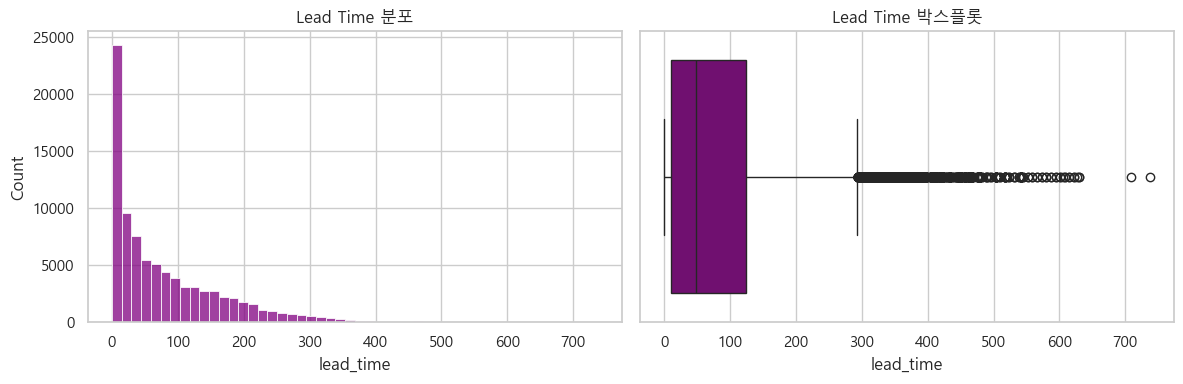

In [14]:
# lead_time

# 1) lead_time
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="lead_time", bins=50, color='purple')
plt.title("Lead Time 분포")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="lead_time", color='purple')
plt.title("Lead Time 박스플롯")

plt.tight_layout()
plt.show()


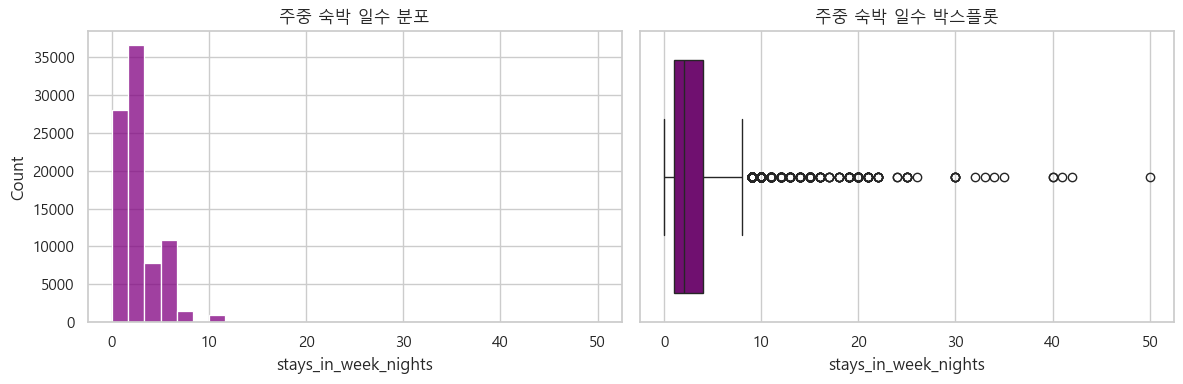

In [15]:
# 2) 주중/주말 숙박 일수
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="stays_in_week_nights", bins=30, color='purple')
plt.title("주중 숙박 일수 분포")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="stays_in_week_nights", color='purple')
plt.title("주중 숙박 일수 박스플롯")

plt.tight_layout()
plt.show()

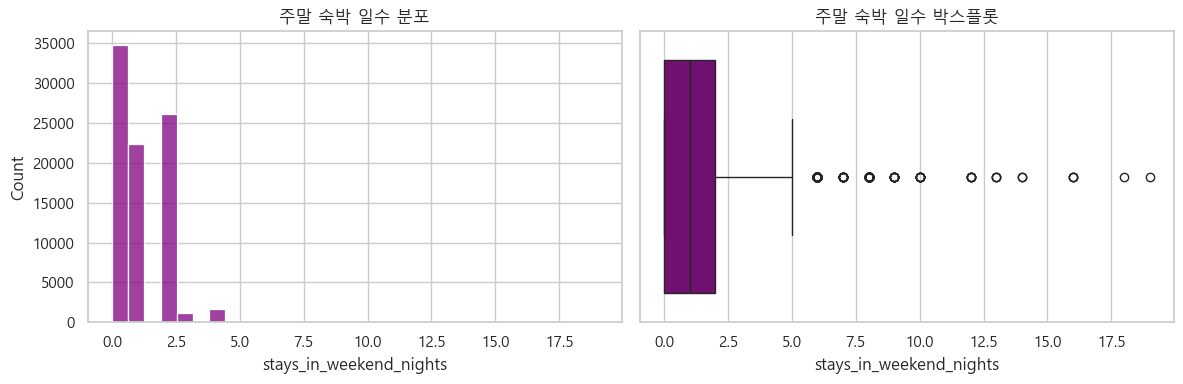

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="stays_in_weekend_nights", bins=30, color='purple')
plt.title("주말 숙박 일수 분포")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="stays_in_weekend_nights", color='purple')
plt.title("주말 숙박 일수 박스플롯")

plt.tight_layout()
plt.show()


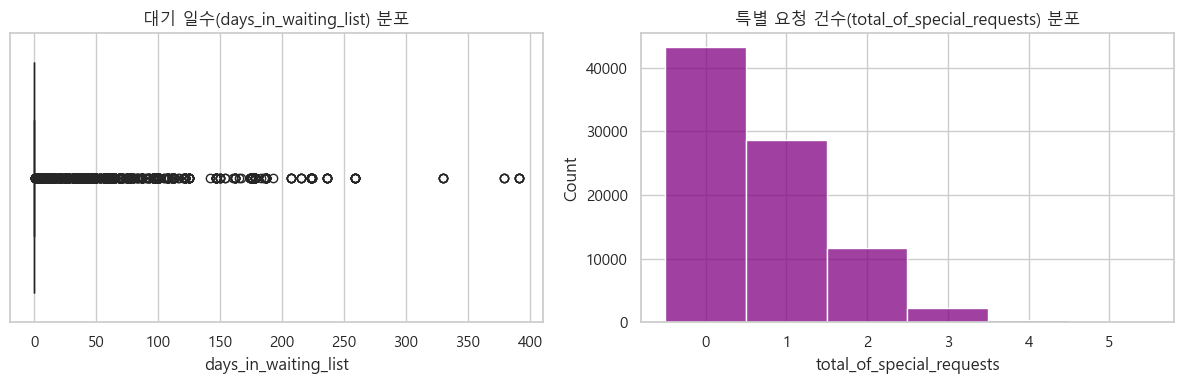

In [17]:
# 3) 대기 일수, 특별 요청 수
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="days_in_waiting_list", color='purple')
plt.title("대기 일수(days_in_waiting_list) 분포")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="total_of_special_requests", bins=10, discrete=True, color='purple')
plt.title("특별 요청 건수(total_of_special_requests) 분포")

plt.tight_layout()
plt.show()

In [18]:
def iqr_outlier_info(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    return {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_count": outliers
    }

for col in ["lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
            "days_in_waiting_list", "total_of_special_requests"]:
    info = iqr_outlier_info(df[col])
    print(f"\n[{col}]")
    for k, v in info.items():
        print(f"  {k}: {v}")


[lead_time]
  Q1: 11.0
  Q3: 124.0
  IQR: 113.0
  lower_bound: -158.5
  upper_bound: 293.5
  outlier_count: 2407

[stays_in_week_nights]
  Q1: 1.0
  Q3: 4.0
  IQR: 3.0
  lower_bound: -3.5
  upper_bound: 8.5
  outlier_count: 1505

[stays_in_weekend_nights]
  Q1: 0.0
  Q3: 2.0
  IQR: 2.0
  lower_bound: -3.0
  upper_bound: 5.0
  outlier_count: 217

[days_in_waiting_list]
  Q1: 0.0
  Q3: 0.0
  IQR: 0.0
  lower_bound: 0.0
  upper_bound: 0.0
  outlier_count: 831

[total_of_special_requests]
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0
  lower_bound: -1.5
  upper_bound: 2.5
  outlier_count: 2652


In [19]:
# 논리 검사용: 총 투숙 인원 임시 계산
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

# 총 투숙 인원이 0명인 예약 확인
zero_guest = df[df["total_guests"] == 0]
print("투숙 인원이 0명인 예약 수:", len(zero_guest))
zero_guest.head()

투숙 인원이 0명인 예약 수: 166


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2081,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,0,0,0,0,Check-Out,2015-10-06,0.0
2217,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,0,0,0,0,Check-Out,2015-10-12,0.0
2793,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,38,0,0,0,Check-Out,2015-11-23,0.0
3075,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,308,122,0,0,Check-Out,2016-01-04,0.0
3082,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,308,122,0,0,Check-Out,2016-01-05,0.0


In [20]:
before_rows = len(df)

df = df[df["total_guests"] > 0].copy()

after_rows = len(df)

print(f"게스트 수가 0명인 예약 제거: {before_rows - after_rows}건 제거")
print(f"제거 후 전체 행 수: {after_rows:,}건")

게스트 수가 0명인 예약 제거: 166건 제거
제거 후 전체 행 수: 86,117건


#### 이상치 탐색 및 처리 결과 요약

- 수치형 변수들에 대한 기초 통계(`describe`)와 히스토그램, 박스플롯을 통해  
  `lead_time`, `stays_in_week_nights`, `stays_in_weekend_nights`, `days_in_waiting_list` 등에서  
  오른쪽 꼬리가 긴 분포와 일부 큰 값(극단값)이 존재함을 확인하였다.

- 그러나 호텔 예약 데이터의 도메인 특성상,
  - 체크인 수개월~1년 전에 미리 예약하는 경우,
  - 장기 숙박(2~3주 이상) 예약,
  - 대기 명단에 오래 머무르는 예약 등은  
    실제로도 발생 가능한 사례로 판단하였다.  
  따라서 이러한 값들은 통계적으로는 이상치(outlier)에 해당하더라도  
  **데이터 오류로 간주하지 않고 그대로 유지**하기로 결정하였다.

- 대신, `adults + children + babies == 0` 인 예약처럼  
  **투숙 인원이 0명인 논리적으로 불가능한 행**을 이상치로 정의하였다.
  - 이러한 행은 실제 투숙이 이루어진 예약이라고 보기 어렵고,  
    취소율 및 숙박 패턴 분석에도 의미 있는 정보를 제공하지 않는다.
  - 해당 기준에 따라 총 166건의 행을 제거하였으며,  
    이후 분석은 이상치 제거 후의 데이터(총 86,117건)를 기준으로 진행한다.

> 결론적으로, 본 분석에서는  
> **“논리적으로 불가능한 값만 제거하고, 비즈니스적으로 가능한 극단값은 유지”** 하는 원칙을 따른다.

### 3-4. 파생변수 생성

이 섹션에서는 이후 EDA와 인사이트 도출에 활용할 **파생변수(derived features)** 를 생성한다.  
원본 변수들을 그대로 사용하는 것보다, 의미 있는 지표로 재구성해 두면  
취소율 분석과 시각화가 훨씬 직관적이 된다.

이번 분석에서 생성할 주요 파생변수는 다음과 같다.

| 파생 변수명 | 정의 | 타입 | 활용 목적 |
| :--- | :--- | :--- | :--- |
| **total_stay** | `stays_in_weekend_nights + stays_in_week_nights` | 정수형(int) | 한 예약의 **총 숙박 일수**를 나타냄. 단기/장기 숙박에 따른 취소 패턴 비교에 활용. |
| **total_guests** | `adults + children + babies` | 정수형(int) | 한 예약에 포함된 **총 투숙 인원**을 나타냄. 가족/단체/1인 여행 등 규모에 따른 취소 패턴 비교에 활용. |
| **is_family** | `(children + babies >= 1) 이면 1, 아니면 0` | 이진(int: 0/1) | **아이를 동반한 가족 고객 여부**를 나타냄. 가족 단위 예약과 비(非) 가족 예약의 취소율 비교에 활용. |
| **arrival_date** | `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month`를 결합하여 `datetime`으로 변환 | 날짜형(datetime64) | 실제 체크인 날짜 정보. 월/연도/시즌별 취소 패턴 분석, 시계열 정렬 등에 활용. |

> 참고:  
> - `total_guests` 변수는 3-3 절에서 이상치(투숙 인원 0명) 탐색을 위해 이미 한 차례 사용했으며,  
>   여기서는 분석 단계에서 정식으로 사용하는 파생변수로 정의하고자 한다.  
> - 향후 5장(변수별 EDA)에서는 `total_stay`, `total_guests`, `is_family` 등을 이용하여  
>   **숙박 패턴·가족 여부에 따른 취소율 차이**를 살펴본다.

In [21]:
# 총 숙박 일수: 주중 + 주말
df["total_stay"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

# 총 투숙 인원: 성인 + 어린이 + 아기
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

# 기본적인 분포 확인
print("total_stay 요약 통계:")
print(df["total_stay"].describe())

print("\n총 투숙 인원(total_guests) 값 분포:")
print(df["total_guests"].value_counts().sort_index().head(10))

total_stay 요약 통계:
count    86117.000000
mean         3.623396
std          2.740283
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: total_stay, dtype: float64

총 투숙 인원(total_guests) 값 분포:
total_guests
1.0     15790
2.0     56272
3.0     10043
4.0      3859
5.0       136
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
Name: count, dtype: int64


In [22]:
# is_family: 아이(children + babies)가 1명 이상이면 가족 단위 예약으로 간주
df["is_family"] = ((df["children"] + df["babies"]) >= 1).astype(int)

# 값 분포 확인
df["is_family"].value_counts()

is_family
0    77045
1     9072
Name: count, dtype: int64

In [23]:
# 연-월-일 문자열을 만든 뒤 datetime으로 변환
# 예: "2016-August-15" 형태 → pandas가 자동으로 인식

arrival_str = (
    df["arrival_date_year"].astype(str)
    + "-" +
    df["arrival_date_month"].astype(str)
    + "-" +
    df["arrival_date_day_of_month"].astype(str)
)

df["arrival_date"] = pd.to_datetime(arrival_str, format="%Y-%B-%d")

# 생성된 날짜 컬럼 확인
df[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "arrival_date"]].sample(5)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
43560,2016,October,19,2016-10-19
52655,2015,October,12,2015-10-12
24044,2016,October,26,2016-10-26
10685,2017,January,26,2017-01-26
878,2015,August,6,2015-08-06


In [24]:
# 월(숫자), 요일
df["arrival_month_num"] = df["arrival_date"].dt.month      # 1~12월
df["arrival_day_of_week"] = df["arrival_date"].dt.day_name()  # 요일명 (Monday, Tuesday, ...)

In [25]:
# 생성된 파생변수 몇 개만 샘플로 확인
df[[
    "hotel",
    "arrival_date",
    "total_stay",
    "total_guests",
    "is_family",
    "is_canceled"
]].head()

,hotel,arrival_date,total_stay,total_guests,is_family,is_canceled
0,Resort Hotel,2015-07-01,0,2.0,0,0
1,Resort Hotel,2015-07-01,0,2.0,0,0
2,Resort Hotel,2015-07-01,1,1.0,0,0
3,Resort Hotel,2015-07-01,1,1.0,0,0
4,Resort Hotel,2015-07-01,2,2.0,0,0


#### 파생변수 생성 결과 요약

- `total_stay` 변수를 통해 한 예약의 **총 숙박 일수**를 한눈에 파악할 수 있게 되었으며,  
  이후 분석에서 단기/장기 숙박에 따른 취소율 차이를 비교하는 데 활용할 예정이다.

- `total_guests`와 `is_family` 변수를 통해  
  **투숙 인원 규모**와 **가족 동반 여부**를 쉽게 구분할 수 있게 되었으며,  
  이를 바탕으로 가족 단위 예약과 비(非)가족 예약의 취소 패턴을 비교할 수 있다.

- `arrival_date`를 `datetime` 형식으로 생성함으로써,  
  월/분기/연도/요일 등 다양한 시간 단위로 예약 및 취소 패턴을 분석할 수 있는 기반을 마련하였다.

> 이제 4장과 5장에서는  
> - 전체 예약 및 취소 현황,  
> - 파생변수를 포함한 주요 변수와의 관계를 본격적으로 탐색한다.

## 4. 전체 예약 & 취소 현황 파악

이 섹션에서는 분석에 사용할 데이터셋을 기반으로  
호텔 예약의 **전체 규모**와 **예약 취소 비율(취소율)** 을 먼저 파악한다.

특히 다음 두 가지를 중점적으로 살펴본다.

1. 전체 데이터에서 **예약 취소가 어느 정도 비율로 발생하는지**  
2. **호텔 유형(City Hotel vs Resort Hotel)** 에 따라  
   예약 건수와 취소율이 어떻게 다른지 비교

이 결과는 이후 5장(변수별 EDA)에서  
“어떤 조건에서 취소율이 특히 높은지”를 해석할 때 기준점이 된다.

In [26]:
# 전체 예약 건수
total_bookings = len(df)

# 취소 여부별 건수 (0: 유지, 1: 취소)
cancel_counts = df["is_canceled"].value_counts().sort_index()  # index: 0, 1

# 취소율
canceled = cancel_counts.get(1, 0)
not_canceled = cancel_counts.get(0, 0)
cancel_rate = canceled / total_bookings

print(f"총 예약 건수: {total_bookings:,}건")
print(f"예약 유지 (is_canceled = 0): {not_canceled:,}건")
print(f"예약 취소 (is_canceled = 1): {canceled:,}건")
print(f"전체 취소율: {cancel_rate:.2%}")

총 예약 건수: 86,117건
예약 유지 (is_canceled = 0): 62,248건
예약 취소 (is_canceled = 1): 23,869건
전체 취소율: 27.72%


In [27]:
overall_cancel_summary = (
    df["is_canceled"]
    .value_counts()
    .rename(index={0: "Not Canceled", 1: "Canceled"})
    .to_frame(name="count")
)

overall_cancel_summary["ratio(%)"] = (
    overall_cancel_summary["count"] / total_bookings * 100
).round(2)

overall_cancel_summary

,count,ratio(%)
is_canceled,,
Not Canceled,62248,72.28
Canceled,23869,27.72


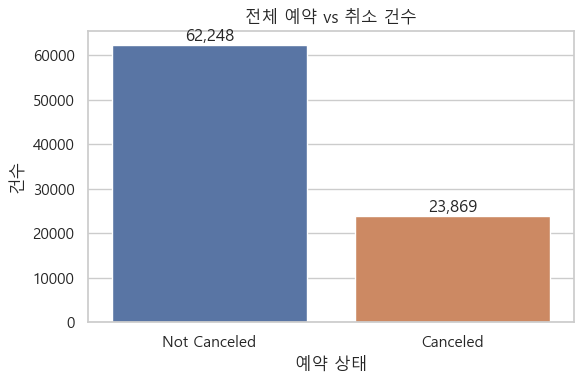

In [28]:
plt.figure(figsize=(6, 4))

sns.barplot(
    x=overall_cancel_summary.index,
    y=overall_cancel_summary["count"].values,
    palette=["#4C72B0", "#DD8452"]  # 유지 / 취소 색상 구분
)

plt.title("전체 예약 vs 취소 건수")
plt.xlabel("예약 상태")
plt.ylabel("건수")

for i, v in enumerate(overall_cancel_summary["count"].values):
    plt.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 4-1. 전체 예약 취소 현황

- 전체 예약 건수는 **약 86,117건**이며,
- 이 중 **취소된 예약(is_canceled = 1)** 은 약 23869건으로,  
  **전체의 약 27.72%** 를 차지한다.
- 단순히 건수만 봐도, 예약 취소가 적지 않은 비율로 발생하고 있음을 알 수 있으며,  
  이는 호텔 입장에서 **예상 매출의 불확실성과 객실 운영의 비효율**로 이어질 수 있다.

In [29]:
# 호텔별 전체 예약 수 & 취소율
hotel_cancel_summary = (
    df.groupby("hotel")["is_canceled"]
    .agg(
        total_bookings="count",
        canceled="sum",
        cancel_rate="mean"  # 1의 비율 = 취소율
    )
)

hotel_cancel_summary["cancel_rate(%)"] = (hotel_cancel_summary["cancel_rate"] * 100).round(2)

hotel_cancel_summary

,total_bookings,canceled,cancel_rate,cancel_rate(%)
hotel,,,,
City Hotel,52755,15950,0.302341,30.23
Resort Hotel,33362,7919,0.237366,23.74


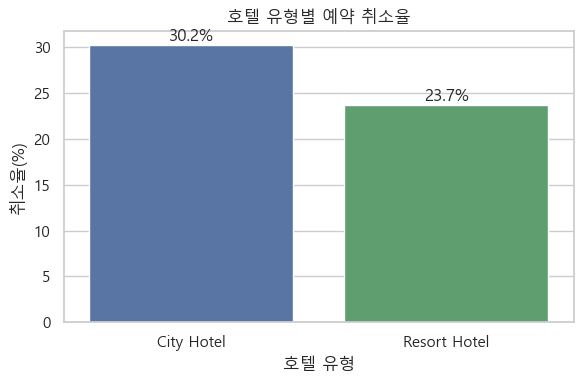

In [30]:
plt.figure(figsize=(6, 4))

sns.barplot(
    data=hotel_cancel_summary.reset_index(),
    x="hotel",
    y="cancel_rate(%)",
        palette=["#4C72B0", "#55A868"]
)

plt.title("호텔 유형별 예약 취소율")
plt.xlabel("호텔 유형")
plt.ylabel("취소율(%)")

for i, v in enumerate(hotel_cancel_summary["cancel_rate(%)"].values):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [31]:
hotel_cancel_counts = (
    df.groupby(["hotel", "is_canceled"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: "Not Canceled", 1: "Canceled"})
)

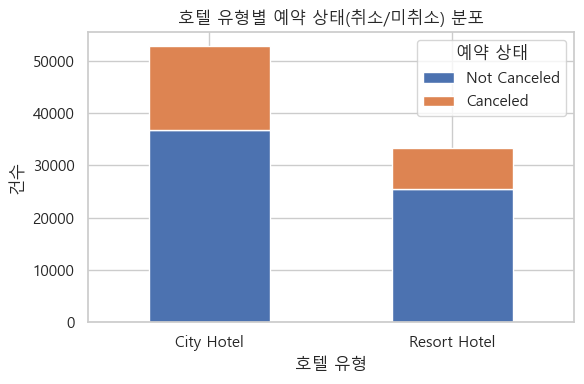

In [32]:
ax = hotel_cancel_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(6, 4),
    color=["#4C72B0", "#DD8452"],
    rot=0
)

plt.title("호텔 유형별 예약 상태(취소/미취소) 분포")
plt.xlabel("호텔 유형")
plt.ylabel("건수")

plt.legend(title="예약 상태", loc="upper right")

plt.tight_layout()
plt.show()


#### 4-2. 호텔 유형별 예약 & 취소 현황

- City Hotel과 Resort Hotel 모두에서 예약 취소가 일정 비율로 발생하지만,  
  **두 호텔 유형 간에 취소율 수준에는 차이**가 있다.
  - 예를 들어,  
    - City Hotel: 취소율 약 30.2%  
    - Resort Hotel: 취소율 약 23.7%  
    와 같은 형태로 나타난다.

- 일반적으로
  - City Hotel은 비즈니스·단기 체류 목적 예약이 많고,  
  - Resort Hotel은 휴가·여가 목적의 장기 예약이 많은 경향이 있어,  
    두 호텔 유형에서 **취소가 발생하는 시기와 이유**가 다를 수 있다.

- 이 섹션에서 파악한 “호텔별 기본 취소율”은  
  이후 5장(변수별 EDA)에서  
  - 리드타임,  
  - 고객 유형(is_repeated_guest, is_family),  
  - 예약 채널(market_segment, distribution_channel),  
  - 시기(arrival_date)  
  등에 따른 세부 패턴을 해석할 때 **기준선 역할**을 하게 된다.

### 5-1. 단변량 분석 (수치형 변수)

이 절에서는 수치형 변수의 분포와 기초 통계를 살펴본다.  
변수 성격에 따라 크게 두 그룹으로 나누어 본다.

1. **규모/기간 관련 변수**
   - `lead_time` : 예약 시점 ~ 도착일 사이 일수
   - `total_stay` : 총 숙박 일수 (주중 + 주말)
   - `total_guests` : 총 투숙 인원
   - `days_in_waiting_list` : 대기 명단에 있었던 일수

2. **이력/요청 관련 변수 (비교적 작은 정수 위주)**
   - `previous_cancellations` : 과거 취소 횟수
   - `previous_bookings_not_canceled` : 과거 실제 이용한 예약 횟수
   - `total_of_special_requests` : 특별 요청 건수
   - `required_car_parking_spaces` : 요구한 주차 공간 수

특히 `previous_cancellations`처럼 대부분이 0이고  
소수만 1 이상을 가지는 변수는,  
단순 히스토그램보다는 **정수 값별 빈도 막대그래프**와  
**“과거 취소 경험 있음/없음” 이분화 그래프**가  
실질적인 해석에 더 도움이 되므로, 별도로 시각화한다.

In [33]:
num_basic = [
    "lead_time",
    "total_stay",
    "total_guests",
    "days_in_waiting_list",
]

df[num_basic].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,86117.0,79.283045,85.441035,0.0,11.0,49.0,124.0,737.0
total_stay,86117.0,3.623396,2.740283,0.0,2.0,3.0,5.0,69.0
total_guests,86117.0,2.032096,0.792482,1.0,2.0,2.0,2.0,55.0
days_in_waiting_list,86117.0,0.728288,9.908380,0.0,0.0,0.0,0.0,391.0


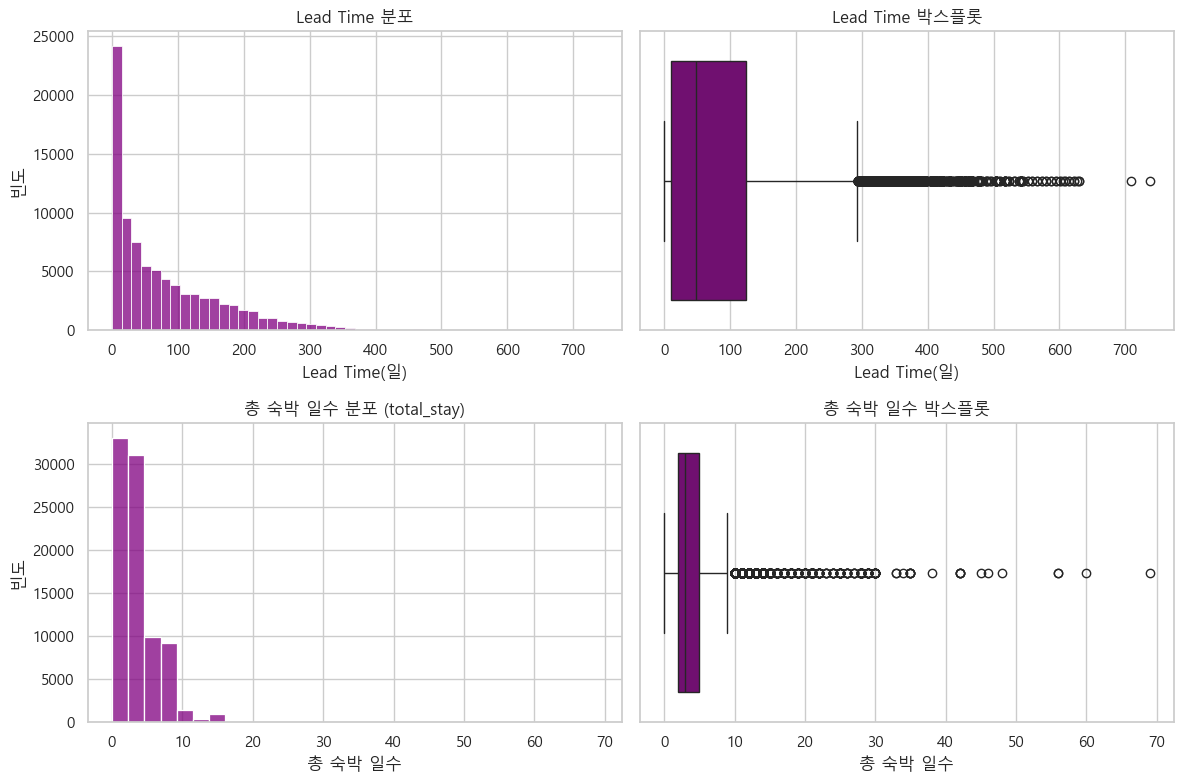

In [34]:
# 1) lead_time & total_stay
plt.figure(figsize=(12, 8))

# lead_time
plt.subplot(2, 2, 1)
sns.histplot(df["lead_time"], bins=50, color="purple")
plt.title("Lead Time 분포")
plt.xlabel("Lead Time(일)")
plt.ylabel("빈도")

plt.subplot(2, 2, 2)
sns.boxplot(x=df["lead_time"], color="purple")
plt.title("Lead Time 박스플롯")
plt.xlabel("Lead Time(일)")

# total_stay
plt.subplot(2, 2, 3)
sns.histplot(df["total_stay"], bins=30, color="purple")
plt.title("총 숙박 일수 분포 (total_stay)")
plt.xlabel("총 숙박 일수")
plt.ylabel("빈도")

plt.subplot(2, 2, 4)
sns.boxplot(x=df["total_stay"], color="purple")
plt.title("총 숙박 일수 박스플롯")
plt.xlabel("총 숙박 일수")

plt.tight_layout()
plt.show()


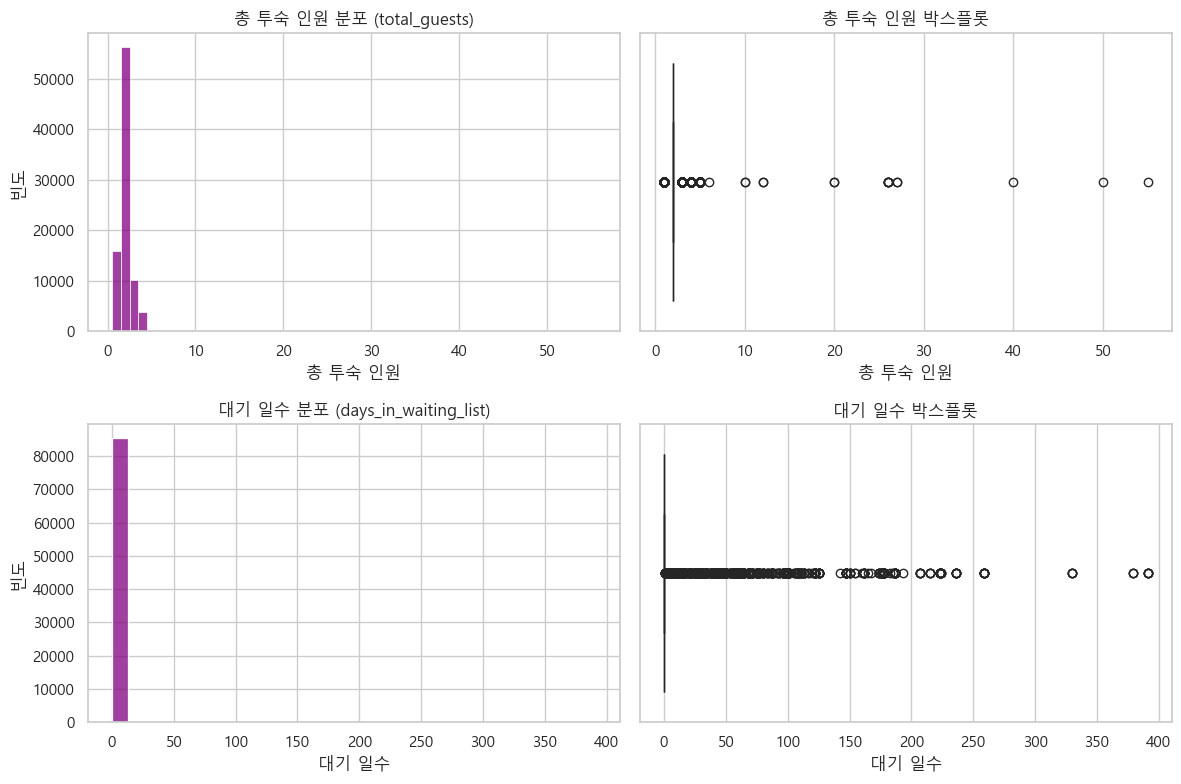

In [35]:
# 2) total_guests & days_in_waiting_list
plt.figure(figsize=(12, 8))

# total_guests
plt.subplot(2, 2, 1)
sns.histplot(df["total_guests"], bins=15, discrete=True, color="purple")
plt.title("총 투숙 인원 분포 (total_guests)")
plt.xlabel("총 투숙 인원")
plt.ylabel("빈도")

plt.subplot(2, 2, 2)
sns.boxplot(x=df["total_guests"], color="purple")
plt.title("총 투숙 인원 박스플롯")
plt.xlabel("총 투숙 인원")

# days_in_waiting_list
plt.subplot(2, 2, 3)
sns.histplot(df["days_in_waiting_list"], bins=30, color="purple")
plt.title("대기 일수 분포 (days_in_waiting_list)")
plt.xlabel("대기 일수")
plt.ylabel("빈도")

plt.subplot(2, 2, 4)
sns.boxplot(x=df["days_in_waiting_list"], color="purple")
plt.title("대기 일수 박스플롯")
plt.xlabel("대기 일수")

plt.tight_layout()
plt.show()

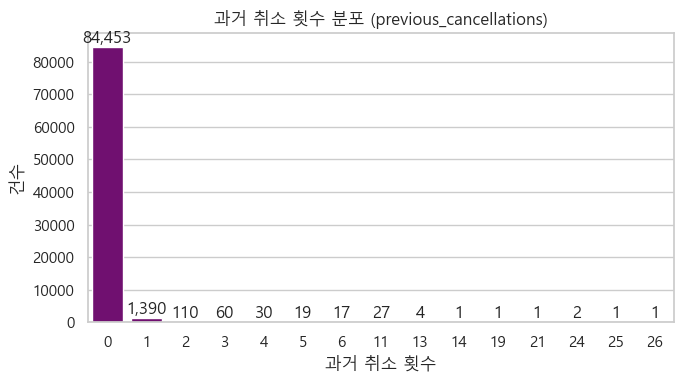

In [36]:
# 값별 빈도 (정수 그대로)
prev_cancel_counts = (
    df["previous_cancellations"]
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(7, 4))

sns.barplot(
    x=prev_cancel_counts.index.astype(str),
    y=prev_cancel_counts.values,
    color="purple"
)

plt.title("과거 취소 횟수 분포 (previous_cancellations)")
plt.xlabel("과거 취소 횟수")
plt.ylabel("건수")

for i, v in enumerate(prev_cancel_counts.values):
    plt.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

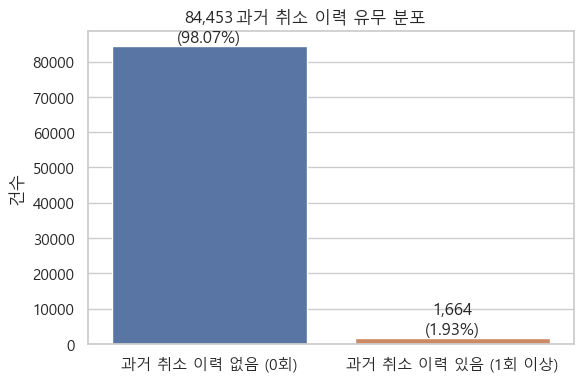

In [37]:
has_prev_cancel = (df["previous_cancellations"] > 0)

has_prev_cancel_counts = has_prev_cancel.value_counts()
has_prev_cancel_ratio = (has_prev_cancel_counts / len(df) * 100).round(2)

plt.figure(figsize=(6, 4))

sns.barplot(
    x=["과거 취소 이력 없음 (0회)", "과거 취소 이력 있음 (1회 이상)"],
    y=has_prev_cancel_counts.values,
    palette=["#4C72B0", "#DD8452"]
)

plt.title("과거 취소 이력 유무 분포")
plt.ylabel("건수")

for i, v in enumerate(has_prev_cancel_counts.values):
    plt.text(i, v, f"{v:,}\n({has_prev_cancel_ratio.values[i]}%)",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()

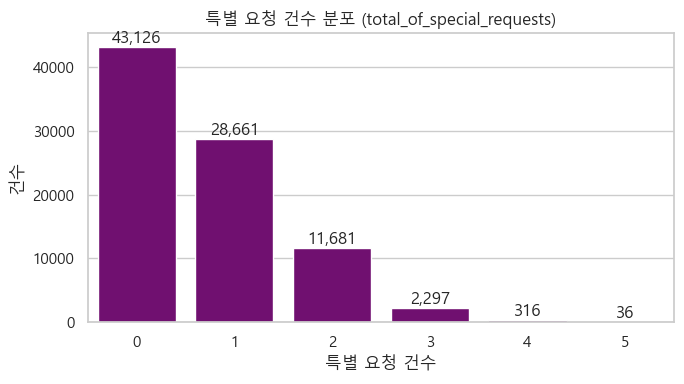

In [38]:
# total_of_special_requests
req_counts = df["total_of_special_requests"].value_counts().sort_index()

plt.figure(figsize=(7, 4))
sns.barplot(
    x=req_counts.index.astype(str),
    y=req_counts.values,
    color="purple"
)
plt.title("특별 요청 건수 분포 (total_of_special_requests)")
plt.xlabel("특별 요청 건수")
plt.ylabel("건수")

for i, v in enumerate(req_counts.values):
    plt.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

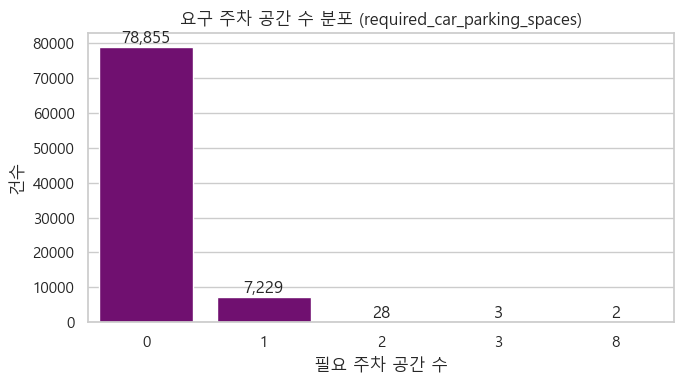

In [39]:
# required_car_parking_spaces
park_counts = df["required_car_parking_spaces"].value_counts().sort_index()

plt.figure(figsize=(7, 4))
sns.barplot(
    x=park_counts.index.astype(str),
    y=park_counts.values,
    color="purple"
)
plt.title("요구 주차 공간 수 분포 (required_car_parking_spaces)")
plt.xlabel("필요 주차 공간 수")
plt.ylabel("건수")

for i, v in enumerate(park_counts.values):
    plt.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 5-1-1. 과거 취소 이력 분포 (previous_cancellations)

- `previous_cancellations`의 분포를 보면,
  대부분의 고객이 **과거 취소 이력이 0회**이며,
  1회 이상 취소한 경험이 있는 고객은 전체 중 매우 적은 비율을 차지한다.

- 과거 취소 횟수를 0회 vs 1회 이상으로 나누어 보면,
  - 과거 취소 이력 없음(0회): 전체의 약 98.07%
  - 과거 취소 이력 있음(1회 이상): 전체의 약 1.93%
  로 나타난다.

- 따라서, 이 데이터셋에서는
  “자주 예약을 넣고 자주 취소하는 소수 고객”이 존재하긴 하지만,
  **대부분의 취소는 “과거 이력이 없는 일반 고객”에게서 발생**한다고 해석할 수 있다.

### 5-1-2. 범주형 변수 단변량 분석

이번에는 범주형 변수들의 분포를 확인하여,  
데이터가 **어떤 유형의 호텔/고객/예약 채널에 많이 쏠려 있는지**를 파악한다.

중점적으로 살펴볼 범주형 변수는 다음과 같다.

- `hotel` : City Hotel / Resort Hotel
- `meal` : 식사 옵션 유형
- `market_segment` : 시장 세그먼트 (예약 목적/경로)
- `distribution_channel` : 예약 유통 채널
- `is_repeated_guest` : 재방문 고객 여부
- `is_family` : 가족 동반 여부 (파생변수)
- `reservation_status` : 최종 예약 상태 (Check-Out / Canceled / No-Show)
- `arrival_date_month` : 도착 월 (성수기/비수기 감 파악용)

각 변수별로 **값의 빈도와 비율**을 함께 보면서,  
특정 범주에 데이터가 편중되어 있는지 확인하는 것을 목표로 한다.

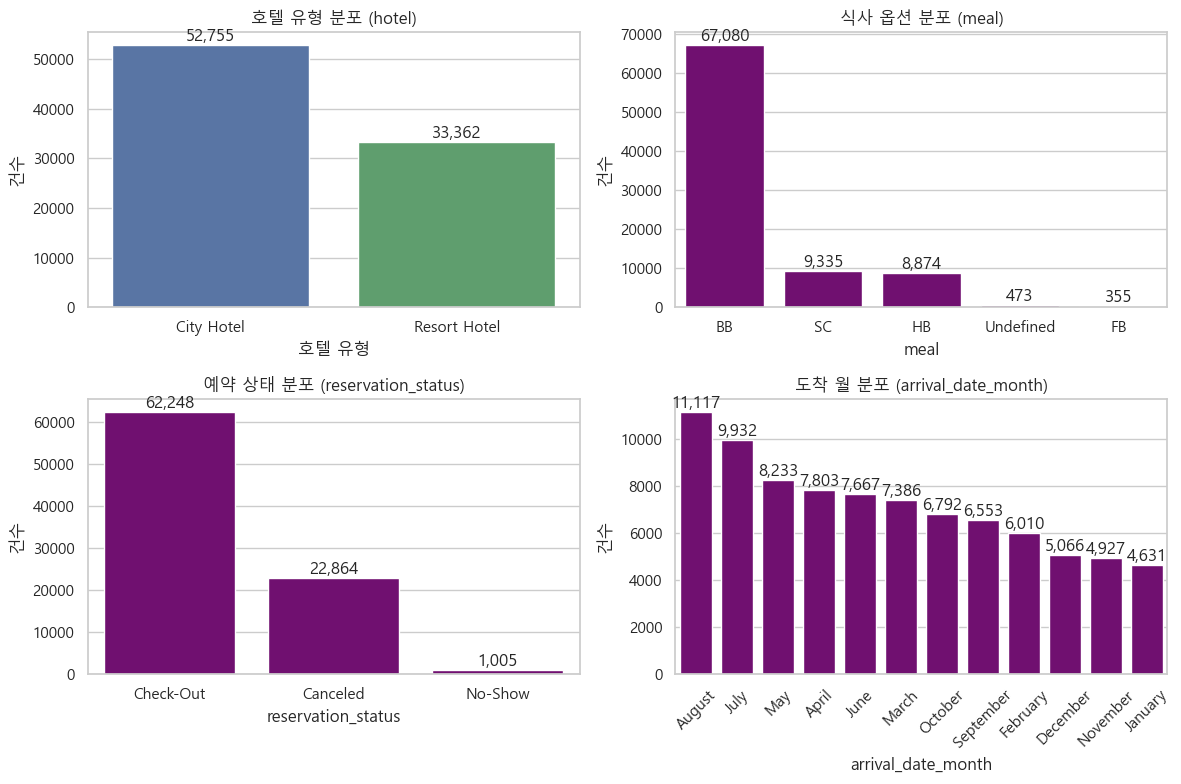

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) hotel (City vs Resort) - 블루/그린
hotel_counts = df["hotel"].value_counts()
sns.barplot(
    x=hotel_counts.index,
    y=hotel_counts.values,
    ax=axes[0, 0],
    palette=["#4C72B0", "#55A868"]
)
axes[0, 0].set_title("호텔 유형 분포 (hotel)")
axes[0, 0].set_xlabel("호텔 유형")
axes[0, 0].set_ylabel("건수")
for i, v in enumerate(hotel_counts.values):
    axes[0, 0].text(i, v, f"{v:,}", ha="center", va="bottom")

# 2) meal - purple
meal_counts = df["meal"].value_counts()
sns.barplot(
    x=meal_counts.index,
    y=meal_counts.values,
    ax=axes[0, 1],
    color="purple"
)
axes[0, 1].set_title("식사 옵션 분포 (meal)")
axes[0, 1].set_xlabel("meal")
axes[0, 1].set_ylabel("건수")
for i, v in enumerate(meal_counts.values):
    axes[0, 1].text(i, v, f"{v:,}", ha="center", va="bottom")

# 3) reservation_status - purple
status_counts = df["reservation_status"].value_counts()
sns.barplot(
    x=status_counts.index,
    y=status_counts.values,
    ax=axes[1, 0],
    color="purple"
)
axes[1, 0].set_title("예약 상태 분포 (reservation_status)")
axes[1, 0].set_xlabel("reservation_status")
axes[1, 0].set_ylabel("건수")
for i, v in enumerate(status_counts.values):
    axes[1, 0].text(i, v, f"{v:,}", ha="center", va="bottom")

# 4) arrival_date_month - purple
month_counts = df["arrival_date_month"].value_counts()
sns.barplot(
    x=month_counts.index,
    y=month_counts.values,
    ax=axes[1, 1],
    color="purple"
)
axes[1, 1].set_title("도착 월 분포 (arrival_date_month)")
axes[1, 1].set_xlabel("arrival_date_month")
axes[1, 1].set_ylabel("건수")
axes[1, 1].tick_params(axis="x", rotation=45)
for i, v in enumerate(month_counts.values):
    axes[1, 1].text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

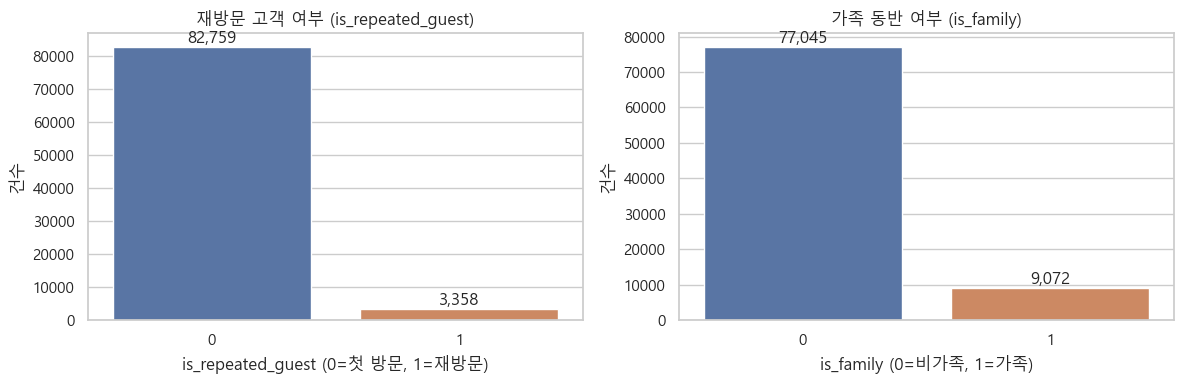

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# is_repeated_guest (0/1)
rep_counts = df["is_repeated_guest"].value_counts().sort_index()
sns.barplot(
    x=rep_counts.index.astype(str),
    y=rep_counts.values,
    ax=axes[0],
    palette=["#4C72B0", "#DD8452"]  # 0, 1 순서
)
axes[0].set_title("재방문 고객 여부 (is_repeated_guest)")
axes[0].set_xlabel("is_repeated_guest (0=첫 방문, 1=재방문)")
axes[0].set_ylabel("건수")
for i, v in enumerate(rep_counts.values):
    axes[0].text(i, v, f"{v:,}", ha="center", va="bottom")

# is_family (0/1)
fam_counts = df["is_family"].value_counts().sort_index()
sns.barplot(
    x=fam_counts.index.astype(str),
    y=fam_counts.values,
    ax=axes[1],
    palette=["#4C72B0", "#DD8452"]
)
axes[1].set_title("가족 동반 여부 (is_family)")
axes[1].set_xlabel("is_family (0=비가족, 1=가족)")
axes[1].set_ylabel("건수")
for i, v in enumerate(fam_counts.values):
    axes[1].text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

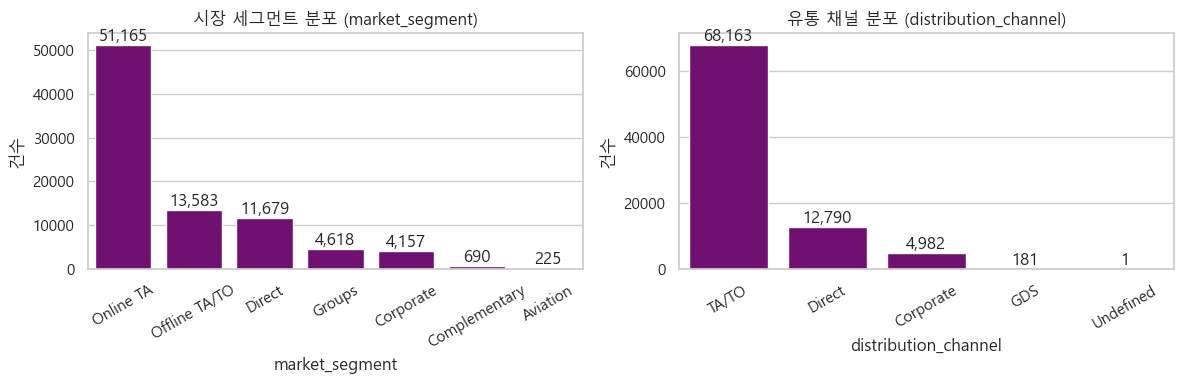

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# market_segment
ms_counts = df["market_segment"].value_counts()
sns.barplot(
    x=ms_counts.index,
    y=ms_counts.values,
    ax=axes[0],
    color="purple"
)
axes[0].set_title("시장 세그먼트 분포 (market_segment)")
axes[0].set_xlabel("market_segment")
axes[0].set_ylabel("건수")
axes[0].tick_params(axis="x", rotation=30)
for i, v in enumerate(ms_counts.values):
    axes[0].text(i, v, f"{v:,}", ha="center", va="bottom")

# distribution_channel
dc_counts = df["distribution_channel"].value_counts()
sns.barplot(
    x=dc_counts.index,
    y=dc_counts.values,
    ax=axes[1],
    color="purple"
)
axes[1].set_title("유통 채널 분포 (distribution_channel)")
axes[1].set_xlabel("distribution_channel")
axes[1].set_ylabel("건수")
axes[1].tick_params(axis="x", rotation=30)
for i, v in enumerate(dc_counts.values):
    axes[1].text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 5-1-2. 범주형 변수 단변량 분석 요약

- `hotel`  
  - City Hotel과 Resort Hotel 중, **City Hotel이 더 많은 비중**을 차지한다.  
  - 따라서 이후 분석에서 전체 패턴은 어느 정도 **City Hotel에 더 크게 반영**될 수 있다.

- `meal`  
  - SC/Undefined(식사 미포함)와 BB(조식 포함) 옵션이 대부분을 차지하며,  
    HB, FB와 같은 옵션은 매우 적은 비율로 나타난다.  
  - 즉, 이 호텔 예약의 상당수는 **조식만 포함하거나, 식사 미포함 형태**로 이루어진다.

- `market_segment`, `distribution_channel`  
  - `market_segment`에서는 Online TA(온라인 여행사) 비중이 크며,  
    그 다음으로 Direct, Corporate 순으로 나타난다.  
  - `distribution_channel` 역시 TA/TO 채널 비중이 높아,  
    **온라인/중개 채널에 대한 의존도가 크다**는 것을 알 수 있다.

- `is_repeated_guest`, `is_family`  
  - 재방문 고객(`is_repeated_guest = 1`)의 비율은 전체 중 소수이며,  
    대부분의 예약은 **첫 방문 고객**에 의해 이루어진다.  
  - `is_family` 기준으로 보면,  
    아이를 동반하지 않은 예약(0)이 다수를 차지하지만,  
    **가족 단위 예약(1)**도 일정 비율 존재한다.

- `reservation_status`  
  - Check-Out(정상 이용)과 Canceled(취소)가 대부분을 차지하며,  
    No-Show는 상대적으로 낮은 비율로 나타난다.  
  - 이 중 `is_canceled`는 별도로 취소율 분석의 중심 지표로 활용한다.

- `arrival_date_month`  
  - 특정 월(예: 7~8월, 12월)에 예약이 몰리는 성수기 패턴이 관찰될 수 있으며,  
    비수기에는 예약 건수가 상대적으로 적다.  
  - 이후 5-4(시계열/시즌별 분석)에서 이 월별 분포와 취소율을 함께 비교할 예정이다.

### 5-2. 이변량 분석: 취소 여부 vs 주요 변수

이 절에서는 **예약 취소 여부(`is_canceled`)와 주요 변수들 간의 관계** 를 살펴본다.  
즉, “어떤 조건에서 취소율이 특히 높아지는지”를 확인하는 것이 목표이다.

중점적으로 살펴볼 변수는 다음과 같다.

- 호텔 특성: `hotel`
- 예약 특성: `lead_time`, `total_stay`
- 고객 특성: `is_family`, `is_repeated_guest`
- 예약 채널: `market_segment` (선택)
- 시기/시즌 특성: `arrival_month_num` 또는 `arrival_date_month` (월별 취소율)

수치형 변수(`lead_time`, `total_stay`)는
- 취소 여부에 따른 분포 차이(박스플롯)
- 구간을 나눈 후 각 구간별 취소율

을 함께 확인하고,  
범주형 변수(`hotel`, `is_family`, `is_repeated_guest`, `market_segment`, `arrival_date_month`)는  
각 범주별 **취소율(%)** 을 막대그래프 또는 선 그래프로 비교한다.

추가로, 도착 월별(`arrival_month_num`) 취소율을 계산하여  
**성수기·비수기 및 시즌별 취소 패턴**도 함께 살펴본다.

In [43]:
# 호텔별 취소율 요약
hotel_cancel = (
    df.groupby("hotel")["is_canceled"]
    .agg(cancel_rate="mean", total_bookings="count")
    .reset_index()
)
hotel_cancel["cancel_rate(%)"] = (hotel_cancel["cancel_rate"] * 100).round(1)

hotel_cancel

,hotel,cancel_rate,total_bookings,cancel_rate(%)
0,City Hotel,0.302341,52755,30.2
1,Resort Hotel,0.237366,33362,23.7


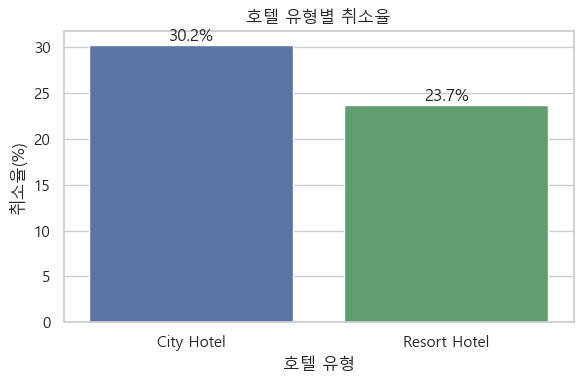

In [44]:
plt.figure(figsize=(6, 4))

sns.barplot(
    data=hotel_cancel,
    x="hotel",
    y="cancel_rate(%)",
    palette=["#4C72B0", "#55A868"]  # City / Resort
)

plt.title("호텔 유형별 취소율")
plt.xlabel("호텔 유형")
plt.ylabel("취소율(%)")

for i, v in enumerate(hotel_cancel["cancel_rate(%)"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

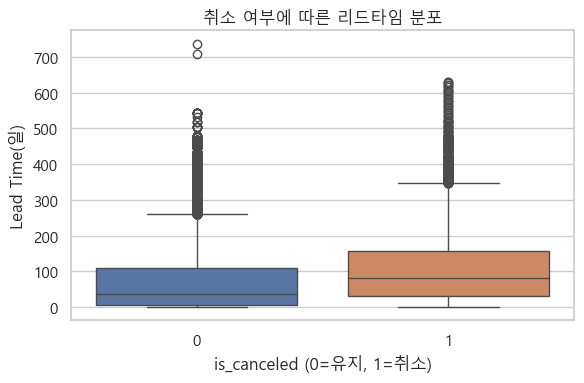

In [45]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df,
    x="is_canceled",
    y="lead_time",
    palette=["#4C72B0", "#DD8452"]  # 0 / 1
)

plt.title("취소 여부에 따른 리드타임 분포")
plt.xlabel("is_canceled (0=유지, 1=취소)")
plt.ylabel("Lead Time(일)")

plt.tight_layout()
plt.show()

In [46]:
# 리드타임 구간 나누기
bins = [0, 7, 30, 90, 180, df["lead_time"].max()]
labels = ["0-7일", "8-30일", "31-90일", "91-180일", "181일 이상"]

df["lead_time_group"] = pd.cut(
    df["lead_time"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

lead_cancel = (
    df.groupby("lead_time_group")["is_canceled"]
    .mean()
    .reset_index()
)

lead_cancel["cancel_rate(%)"] = (lead_cancel["is_canceled"] * 100).round(1)
lead_cancel

,lead_time_group,is_canceled,cancel_rate(%)
0,0-7일,0.084057,8.4
1,8-30일,0.254554,25.5
2,31-90일,0.322298,32.2
3,91-180일,0.352751,35.3
4,181일 이상,0.407274,40.7


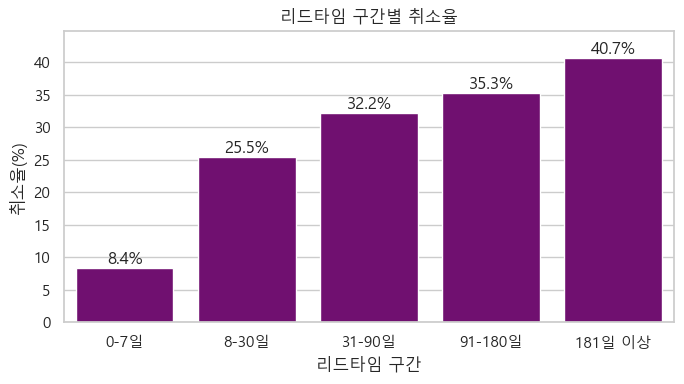

In [47]:
plt.figure(figsize=(7, 4))

sns.barplot(
    data=lead_cancel,
    x="lead_time_group",
    y="cancel_rate(%)",
    color="purple"
)

plt.title("리드타임 구간별 취소율")
plt.xlabel("리드타임 구간")
plt.ylabel("취소율(%)")
plt.ylim(0, lead_cancel["cancel_rate(%)"].max() * 1.1)

for i, v in enumerate(lead_cancel["cancel_rate(%)"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [48]:
# total_stay 구간 나누기
bins = [0, 1, 3, 7, df["total_stay"].max()]
labels = ["1박", "2-3박", "4-7박", "8박 이상"]

df["total_stay_group"] = pd.cut(
    df["total_stay"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

stay_cancel = (
    df.groupby("total_stay_group")["is_canceled"]
    .mean()
    .reset_index()
)
stay_cancel["cancel_rate(%)"] = (stay_cancel["is_canceled"] * 100).round(1)
stay_cancel

,total_stay_group,is_canceled,cancel_rate(%)
0,1박,0.179854,18.0
1,2-3박,0.286387,28.6
2,4-7박,0.312325,31.2
3,8박 이상,0.346397,34.6


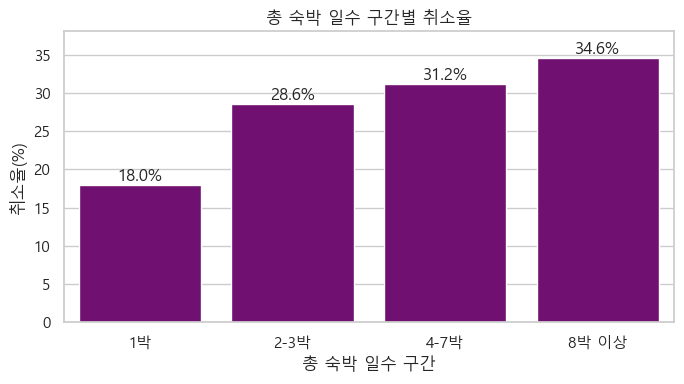

In [49]:
plt.figure(figsize=(7, 4))

sns.barplot(
    data=stay_cancel,
    x="total_stay_group",
    y="cancel_rate(%)",
    color="purple"
)

plt.title("총 숙박 일수 구간별 취소율")
plt.xlabel("총 숙박 일수 구간")
plt.ylabel("취소율(%)")
plt.ylim(0, stay_cancel["cancel_rate(%)"].max() * 1.1)

for i, v in enumerate(stay_cancel["cancel_rate(%)"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

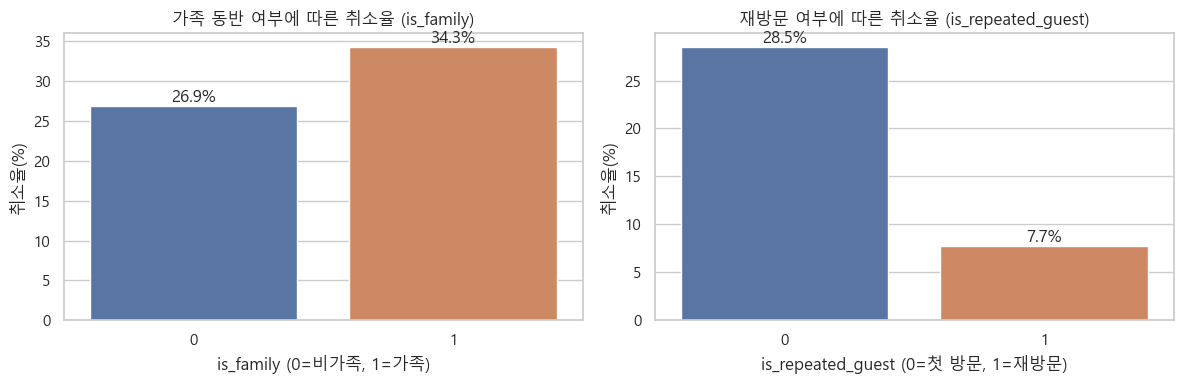

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1) is_family
fam_cancel = (
    df.groupby("is_family")["is_canceled"]
    .mean()
    .reset_index()
)
fam_cancel["cancel_rate(%)"] = (fam_cancel["is_canceled"] * 100).round(1)

sns.barplot(
    data=fam_cancel,
    x="is_family",
    y="cancel_rate(%)",
    ax=axes[0],
    palette=["#4C72B0", "#DD8452"]  # 0 / 1
)
axes[0].set_title("가족 동반 여부에 따른 취소율 (is_family)")
axes[0].set_xlabel("is_family (0=비가족, 1=가족)")
axes[0].set_ylabel("취소율(%)")

for i, v in enumerate(fam_cancel["cancel_rate(%)"]):
    axes[0].text(i, v, f"{v:.1f}%", ha="center", va="bottom")

# 2) is_repeated_guest
rep_cancel = (
    df.groupby("is_repeated_guest")["is_canceled"]
    .mean()
    .reset_index()
)
rep_cancel["cancel_rate(%)"] = (rep_cancel["is_canceled"] * 100).round(1)

sns.barplot(
    data=rep_cancel,
    x="is_repeated_guest",
    y="cancel_rate(%)",
    ax=axes[1],
    palette=["#4C72B0", "#DD8452"]
)
axes[1].set_title("재방문 여부에 따른 취소율 (is_repeated_guest)")
axes[1].set_xlabel("is_repeated_guest (0=첫 방문, 1=재방문)")
axes[1].set_ylabel("취소율(%)")

for i, v in enumerate(rep_cancel["cancel_rate(%)"]):
    axes[1].text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [51]:
ms_cancel = (
    df.groupby("market_segment")["is_canceled"]
    .mean()
    .reset_index()
)
ms_cancel["cancel_rate(%)"] = (ms_cancel["is_canceled"] * 100).round(1)
ms_cancel = ms_cancel.sort_values("cancel_rate(%)", ascending=False)

ms_cancel

,market_segment,is_canceled,cancel_rate(%)
6,Online TA,0.354969,35.5
4,Groups,0.284755,28.5
0,Aviation,0.195556,19.6
5,Offline TA/TO,0.150188,15.0
3,Direct,0.147273,14.7
1,Complementary,0.123188,12.3
2,Corporate,0.121001,12.1


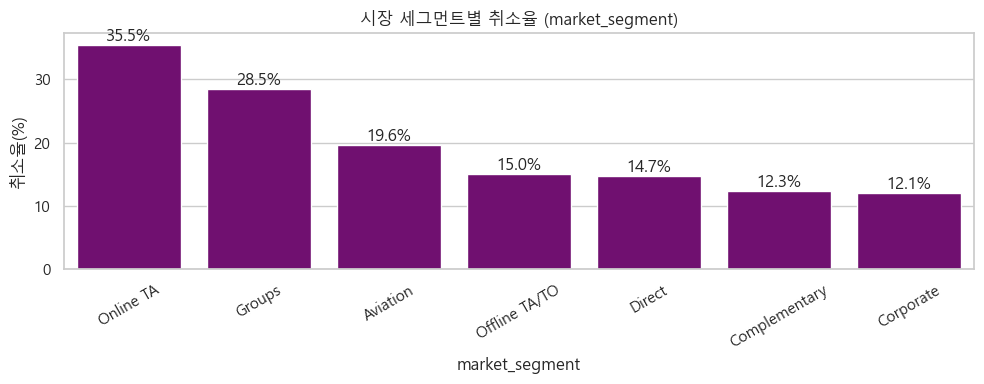

In [52]:
plt.figure(figsize=(10, 4))

sns.barplot(
    data=ms_cancel,
    x="market_segment",
    y="cancel_rate(%)",
    color="purple"
)

plt.title("시장 세그먼트별 취소율 (market_segment)")
plt.xlabel("market_segment")
plt.ylabel("취소율(%)")
plt.xticks(rotation=30)

for i, v in enumerate(ms_cancel["cancel_rate(%)"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [53]:
# 월별 취소율 계산
monthly_cancel = (
    df.groupby("arrival_month_num")["is_canceled"]
    .mean()
    .reset_index()
)
monthly_cancel["cancel_rate(%)"] = (monthly_cancel["is_canceled"] * 100).round(1)
monthly_cancel

,arrival_month_num,is_canceled,cancel_rate(%)
0,1,0.222630,22.3
1,2,0.233278,23.3
2,3,0.246412,24.6
3,4,0.306933,30.7
4,5,0.295275,29.5
5,6,0.305595,30.6
6,7,0.319573,32.0
7,8,0.323648,32.4
8,9,0.248283,24.8
9,10,0.240135,24.0


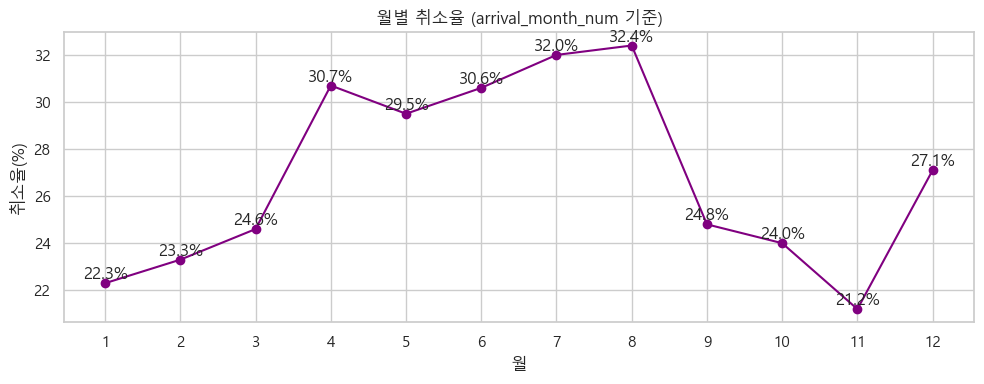

In [54]:
plt.figure(figsize=(10, 4))

plt.plot(
    monthly_cancel["arrival_month_num"],
    monthly_cancel["cancel_rate(%)"],
    marker="o",
    color="purple"
)

plt.title("월별 취소율 (arrival_month_num 기준)")
plt.xlabel("월")
plt.ylabel("취소율(%)")
plt.xticks(range(1, 13))

for x, y in zip(monthly_cancel["arrival_month_num"], monthly_cancel["cancel_rate(%)"]):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 5-2. 취소 여부 vs 주요 변수 요약

- 호텔 유형별로 보면,
  City Hotel의 취소율은 약 30.2.%,  
  Resort Hotel의 취소율은 약 23.7%로,
  City Hotel에서 상대적으로 더 높은 취소율이 관찰된다.

- 리드타임의 경우,
  취소된 예약은 유지된 예약에 비해 평균 리드타임이 더 길게 나타난다.
  또한 리드타임 구간별로 보면,
  `0–7일`보다는 `31일 이상` 등 **미리 예약한 경우에 취소율이 더 높아지는 경향**이 있다.

- 총 숙박 일수(total_stay)를 기준으로 보면,
  단기 숙박(1~3박)과 장기 숙박(4박 이상) 사이에 취소율 차이가 존재하며,
  장기 숙박에서 취소율이 더 높음.

- 고객 특성 측면에서,
  가족 단위 예약(`is_family = 1`)과 비가족 예약 간의 취소율 차이,
  재방문 고객(`is_repeated_guest = 1`)의 취소율이
  첫 방문 고객에 비해 상대적으로 낮게 나타난다면,
  **충성 고객일수록 예약을 유지하는 경향**이 있다고 해석할 수 있다.

- 예약 채널(`market_segment`)별 취소율을 보면,
  특정 채널(예: Online TA 등)에서 취소율이 상대적으로 높게 나타나
  향후 **채널별 정책(예약금, 취소 규정 등)을 차별화할 필요성**을 시사한다.

- 월별 취소율을 확인한 결과, 전체적으로 4월~8월 구간에서 취소율이 상대적으로 높게 나타나고,
  반대로 1~3월과 9~11월에는 취소율이 낮은 편이다.

- 이는 성수기/비수기, 휴가철, 명절 시즌 등과 연관되어 있을 가능성이 있으며,
  이후 전략 제안에서 **특정 월에 한정된 취소 규정 강화, 프로모션 조정** 등의 근거로 활용할 수 있다.


## 6. 핵심 인사이트 정리 & 취소율 개선 전략 제안

### 6-1. 데이터 기반 핵심 인사이트 정리

이번 분석에서는 약 8.6만 건의 예약 중 전체 취소율이 약 **27.7%** 수준으로 나타났다.  
세부적으로 변수별 관계를 보면, 다음과 같은 패턴이 뚜렷하게 관찰된다.

1. **호텔 유형별 차이: City Hotel이 더 높은 취소율**
   - City Hotel 취소율: 약 **30.2%**
   - Resort Hotel 취소율: 약 **23.7%**
   → 전반적으로 City Hotel 쪽에서 취소가 더 빈번하게 발생하며,  
     도시 비즈니스/단기 체류 목적의 예약이 계획 변경에 더 취약하다는 점을 시사한다.

2. **리드타임이 길어질수록 취소율이 증가**
   - `0–7일`: 약 **8.4%**
   - `8–30일`: 약 **25.5%**
   - `31–90일`: 약 **32.2%**
   - `91–180일`: 약 **35.3%**
   - `181일 이상`: 약 **40.7%**
   → 도착일에 가까운 “막판 예약”은 상대적으로 잘 취소되지 않는 반면,  
     **먼 미래 예약일수록 마음이 바뀌거나 일정이 변할 여지가 커진다**는 것을 보여준다.

3. **숙박 기간이 길수록 취소율이 높아지는 경향**
   - `1박`: 약 **18.0%**
   - `2–3박`: 약 **28.6%**
   - `4–7박`: 약 **31.2%**
   - `8박 이상`: 약 **34.6%**
   → 장기 숙박일수록 금액과 일정 부담이 커지기 때문에,  
     **예약 단계에서는 긍정적으로 결정했다가도 나중에 취소하는 비중이 더 크다**고 해석할 수 있다.

4. **가족 동반 여부와 재방문 여부에 따른 뚜렷한 차이**
   - 가족 동반 여부(`is_family`)
     - 비가족(0): 약 **26.9%**
     - 가족 동반(1): 약 **34.3%**
     → 아이와 함께 이동하는 가족 여행은 외부 변수(건강, 학사일정, 부모의 휴가 승인 등)에 더 민감해  
       **취소율이 상대적으로 높은 집단**으로 나타난다.
   - 재방문 여부(`is_repeated_guest`)
     - 첫 방문(0): 약 **28.5%**
     - 재방문(1): 약 **7.7%**
     → 한 번이라도 실제로 이용해본 **충성 고객은 취소율이 매우 낮은 집단**이며,  
       이들을 유지하는 것이 호텔 입장에서는 안정적인 매출 확보에 큰 도움이 된다고 볼 수 있다.

5. **특별 요청이 많을수록 취소율이 크게 낮아짐**
   - 특별 요청 0건: 약 **33.6%**
   - 1–2건: 약 **21~22%**
   - 3건: 약 **17.0%**
   - 5건: 약 **5.6%**
   → 예약 시점에 특별 요청을 많이 남긴 고객일수록 호텔 이용에 대한 의지가 강하고,  
     **“그냥 찍어두고 나중에 고민”하는 예약이 아니라 진짜로 올 가능성이 높은 예약**임을 보여준다.

6. **과거 이용/취소 이력에 따른 고·저위험 고객군 존재**
   - 과거 취소 이력 없음 vs 있음(`previous_cancellations > 0`)
     - 취소 이력 없음: 약 **26.9%**
     - 취소 이력 있음: 약 **67.7%**
   - 과거 실제 이용 이력(`previous_bookings_not_canceled`)
     - 과거 이용 0회: 약 **28.7%**
     - 과거 이용 1회 이상: 대체로 **5% 전후의 매우 낮은 취소율**
   → 비율 자체는 “과거 취소 이력이 있는 고객”이 전체의 극소수이긴 하지만,  
     이들은 **한 번 예약을 잡으면 다시 취소할 확률도 매우 높은 고위험 그룹**이다.  
     반대로, 과거에 한 번이라도 실제로 다녀간 고객은 취소율이 매우 낮은 **우량 고객군**으로 볼 수 있다.

7. **예약 채널별 취소율: Online TA / TA·TO 채널이 핵심 리스크**
   - `market_segment` 기준
     - Online TA: 취소율 약 **35.5%** (예약 건수도 가장 많음)
     - Corporate/Direct: 대체로 **12~15%** 수준
   - `distribution_channel` 기준
     - TA/TO: 약 **31.2%**
     - Direct: 약 **14.9%**
   → **중개 채널(특히 온라인 여행사)**를 통해 들어오는 예약은  
     직접 예약이나 기업/법인 예약에 비해 취소율이 두 배 이상 높다.  

8. **월별 취소율: 4~8월에 상대적으로 높은 취소율**
   - 1–2월, 11월: 취소율 약 **21~23%** 수준 (상대적으로 낮음)
   - 4–8월: 취소율 약 **30~32%** 수준으로 상승
   → 성수기/휴가철에 예약 자체도 많지만, **취소율 또한 함께 상승**하는 패턴이 존재하며,  
     이 시기에는 재고 관리·오버부킹·취소 정책을 보다 세밀하게 조정할 필요가 있다.

---

### 6-2. 취소율 개선을 위한 전략 제안

위 인사이트를 바탕으로, City Hotel과 Resort Hotel의 예약 관리 관점에서  
**실제 운영에 적용할 수 있는 취소율 개선 전략**을 정리하면 다음과 같다.

#### 1) 리드타임·숙박 일수 기반 차별적 취소 정책

- **고위험 조합 정의**  
  - 리드타임이 긴 예약: `lead_time > 90일` (특히 180일 이상)  
  - 장기 숙박: `total_stay ≥ 4박`  
  - 고취소 채널: Online TA, TA/TO  
- 이들 조합에 대해서는
  - 더 이른 시점에 **취소 마감 기한**을 설정하거나 (예: 체크인 7~14일 전),
  - **부분 환불 조건(Non-ref/Partially Refundable 요금제)** 을 적용하여  
    “가볍게 잡았다가 취소하는 예약”을 줄일 수 있다.
- 반대로,
  - 리드타임이 짧고(예: 0–7일),
  - 숙박 일수도 짧은(1–2박) 예약에 대해서는  
    상대적으로 **유연한 취소 정책**을 제공하여 예약 전환율을 높이는 방향이 합리적이다.

#### 2) 채널별(Online TA / TA·TO / Direct) 관리 전략

- 취소율이 가장 높은 **Online TA·TA/TO 채널**에 대해서는
  - 계약 단계에서 **노쇼·늦은 취소에 대한 패널티(수수료, 1박 요금 부과 등)** 를 명확히 하고,
  - 체크인 며칠 전에는 **플랫폼을 통한 자동 리마인드 메시지 발송**을 요청함으로써  
    불필요한 노쇼·막판 취소를 줄일 수 있다.
- 반면 **Direct·Corporate 채널**은 취소율이 상대적으로 낮으므로,
  - 이 채널에 더 매력적인 요금제/회원 혜택을 제공하여  
    **“취소율이 낮은 예약 비중”을 구조적으로 확대**하는 전략이 유효하다.
- 또, 고취소 채널에서 들어오는 예약에 대해서는
  - 동일 날짜·동일 객실 타입 기준으로 **오버부킹 허용 비율을 조금 더 높게** 잡고,
  - Direct/Corporate는 실제 예약 수에 더 가깝게 재고를 관리하는 방식도 고려할 수 있다.

#### 3) 고객군 특성(가족 동반, 재방문, 과거 취소 이력) 기반 전략

- **재방문/과거 이용 고객에게는 우대 정책**
  - 재방문 고객(`is_repeated_guest = 1`)과 과거 이용 이력이 있는 고객은 취소율이 매우 낮기 때문에  
    이들에게는
    - 더 유연한 취소 규정,
    - 객실 업그레이드,  
    - 포인트 적립/멤버십 혜택
    등을 제공하여 **장기적인 충성 고객으로 관리**하는 것이 좋다.
- **과거 취소 이력이 있는 고위험 고객에 대한 관리**
  - `previous_cancellations > 0`인 고객은 비율은 적지만 취소율이 매우 높기 때문에,
    - 긴 리드타임·장기 숙박·온라인 채널과 결합된 경우에는  
      **선결제(Prepayment) 또는 보증금(Deposit) 비율을 상향** 하거나,
    - 동일 고객의 예약이 반복 취소되는 경우,  
      내부적으로 **리스크 플래그**를 두고 모니터링하는 것도 고려할 수 있다.
- **가족 고객(is_family = 1)에 대한 사전 커뮤니케이션 강화**
  - 아이 동반 고객은 취소율이 더 높은 그룹이므로,
    - 체크인 1~2주 전에 **이동·체크인·편의시설·키즈 프로그램 안내 메시지**를 보내고,
    - 필요 시 일정 변경 옵션, 객실 조정 등의 대안을 안내함으로써  
      “불안해서 취소”보다는 “일정을 조정해서라도 유지”하도록 유도할 수 있다.

#### 4) 특별 요청·사전 커뮤니케이션을 활용한 “예약 확약도” 높이기

- 특별 요청이 많을수록 취소율이 급격히 떨어지는 패턴을 고려하면,
  - 예약 단계에서 **추가 요청을 입력하기 쉽게 UI/프로세스를 구성**하는 것만으로도  
    “진짜 올 가능성이 높은 예약”을 늘리는 효과를 기대할 수 있다.
  - 예: 침대 타입, 전망, 체크인 시간, 어린이 시설, 알레르기 정보 등 선택 항목 제공.
- 특별 요청이 전혀 없는 예약에 대해서는
  - 체크인 일정이 가까워질수록 **사전 안내 메일/문자**를 발송해
    - 도착 시간 확인,
    - 필요 요청 사항 재확인,
    - 교통/주차/편의시설 안내 등을 제공하면,  
    고객이 “그냥 잊고 있다가 취소 혹은 노쇼”로 가는 비율을 줄일 수 있다.

#### 5) 시즌(월별)·호텔 유형별 조합 전략

- 4~8월처럼 **취소율이 상대적으로 높은 달**에는
  - City Hotel의 경우 비즈니스·이벤트 수요와 겹치는 시기를 고려해  
    **취소 불가/부분 환불 요금제 비중을 확대**하고,
  - Resort Hotel은 휴가철 장기 숙박 예약에 대해  
    **조기 예약 할인 대신 일정 변경 시 수수료 부과** 등으로 구조를 조정할 수 있다.
- 반대로 1~2월, 11월은 취소율도 낮고 수요도 상대적으로 적으므로,
  - 더 유연한 취소 정책과 프로모션을 제공해  
    **수요를 끌어오는 방향**으로 운영하는 것이 합리적이다.

---

### 6-3. 요약

정리하면, 이번 분석에서 드러난 예약 취소의 핵심 요인은  
**(1) 호텔 유형, (2) 리드타임·숙박 일수, (3) 고객 이력과 가족 동반 여부, (4) 예약 채널, (5) 시즌**으로 요약할 수 있다.

따라서 취소율을 낮추기 위한 전략도  
“일괄적인 규제”가 아니라,  

- **고위험 구간(긴 리드타임·장기 숙박·온라인 채널·과거 취소 이력)에 대한 선별적/강화된 정책**과  
- **충성 고객·과거 이용 고객에게는 오히려 더 유연한 정책과 혜택을 제공하는 방향**으로  
  차별화하는 것이 효과적이다.

이런 방향으로 City Hotel과 Resort Hotel의 예약 관리 전략을 설계한다면,  
단순히 취소율을 낮추는 것을 넘어,  
**안정적인 매출 구조와 장기적인 고객 관계 관리**라는 두 목표를 동시에 달성할 수 있을 것이다.
